https://stackoverflow.com/questions/11808074/what-is-an-intuitive-explanation-of-the-expectation-maximization-technique

In [1]:
from scipy.interpolate import interp1d

https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
def estimate_mean(data, weight):
    return np.sum(data * weight) / np.sum(weight)

def estimate_std(data, weight, mean):
    variance = np.sum(weight * (data - mean)**2) / np.sum(weight)
    return np.sqrt(variance)

In [4]:
np.random.seed(110) # for reproducible random results

# set parameters
red_mean = 3
red_std = 0.8

blue_mean = 7
blue_std = 2

In [5]:
# draw 20 samples from normal distributions with red/blue parameters
red = np.random.normal(red_mean, red_std, size=20)
blue = np.random.normal(blue_mean, blue_std, size=20)

both_colours = np.sort(np.concatenate((red, blue))) # for later use...

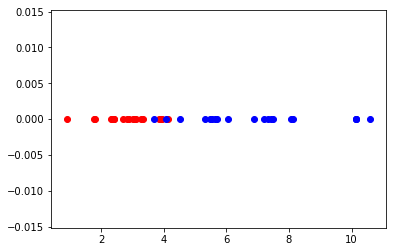

In [6]:
plt.scatter(red, np.zeros(len(red)), c='red')
plt.scatter(blue, np.zeros(len(blue)), c='blue')
plt.show()

1. Start with an initial estimate of what each parameter might be.
2. Compute the likelihood that each parameter produces the data point (expectation).
3. Calculate weights for each data point based on the likelihood of it being produced by a parameter.
4. Combine these weights together with the data to compute a better estimate for the parameters (maximisation).
5. Repeat steps 2 to 4 until the parameter estimate converges (the process stops producing a different estimate).

In [7]:
# estimates for the mean
red_mean_guess = 1.1
blue_mean_guess = 9

# estimates for the standard deviation
red_std_guess = 2
blue_std_guess = 1.7

In [8]:
likelihood_of_red = stats.norm(red_mean_guess, red_std_guess).pdf(both_colours)
likelihood_of_blue = stats.norm(blue_mean_guess, blue_std_guess).pdf(both_colours)

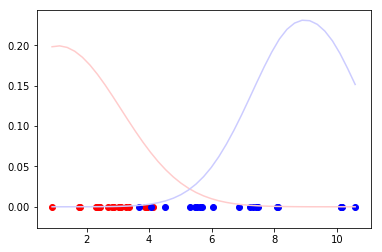

In [9]:
f1 = interp1d(both_colours, likelihood_of_red,  kind='cubic')
f2 = interp1d(both_colours, likelihood_of_blue, kind='cubic')
xnew = np.linspace(min(both_colours), max(both_colours), num=41, endpoint=True)

plt.scatter(red, np.zeros(len(red)), c='red')
plt.scatter(blue, np.zeros(len(blue)), c='blue')


plt.plot(xnew, f1(xnew), c='#FFCCCC')
plt.plot(xnew, f2(xnew), c='#CCCCFF')

plt.show()

In [10]:
likelihood_total = likelihood_of_red + likelihood_of_blue

red_weight = likelihood_of_red / likelihood_total
blue_weight = likelihood_of_blue / likelihood_total

In [11]:
# new estimates for standard deviation
blue_std_guess = estimate_std(both_colours, blue_weight, blue_mean_guess)
red_std_guess = estimate_std(both_colours, red_weight, red_mean_guess)

# new estimates for mean
red_mean_guess = estimate_mean(both_colours, red_weight)
blue_mean_guess = estimate_mean(both_colours, blue_weight)

print blue_std_guess, blue_mean_guess
print red_std_guess, red_mean_guess

2.25496278151 7.65104578125
2.36211176653 3.18442790036


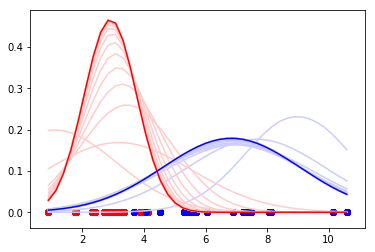

In [12]:
# estimates for the mean
red_mean_guess = 1.1
blue_mean_guess = 9

# estimates for the standard deviation
red_std_guess = 2
blue_std_guess = 1.7

for i in range(20):
    likelihood_of_red = stats.norm(red_mean_guess, red_std_guess).pdf(both_colours)
    likelihood_of_blue = stats.norm(blue_mean_guess, blue_std_guess).pdf(both_colours)

    f1 = interp1d(both_colours, likelihood_of_red,  kind='cubic')
    f2 = interp1d(both_colours, likelihood_of_blue, kind='cubic')
    xnew = np.linspace(min(both_colours), max(both_colours), num=41, endpoint=True)

    plt.scatter(red, np.zeros(len(red)), c='red')
    plt.scatter(blue, np.zeros(len(blue)), c='blue')

    plt.plot(xnew, f1(xnew), c='#FFCCCC')
    plt.plot(xnew, f2(xnew), c='#CCCCFF')

    likelihood_total = likelihood_of_red + likelihood_of_blue

    red_weight = likelihood_of_red / likelihood_total
    blue_weight = likelihood_of_blue / likelihood_total

    # new estimates for standard deviation
    blue_std_guess = estimate_std(both_colours, blue_weight, blue_mean_guess)
    red_std_guess = estimate_std(both_colours, red_weight, red_mean_guess)

    # new estimates for mean
    red_mean_guess = estimate_mean(both_colours, red_weight)
    blue_mean_guess = estimate_mean(both_colours, blue_weight)

f1 = interp1d(both_colours, likelihood_of_red,  kind='cubic')
f2 = interp1d(both_colours, likelihood_of_blue, kind='cubic')
xnew = np.linspace(min(both_colours), max(both_colours), num=41, endpoint=True)

plt.scatter(red, np.zeros(len(red)), c='red')
plt.scatter(blue, np.zeros(len(blue)), c='blue')

plt.plot(xnew, f1(xnew), c='#FF0000')
plt.plot(xnew, f2(xnew), c='#0000FF')
    
plt.show()